In [2692]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report
import pickle as pkl

In [2693]:
data=pd.read_csv('Human_Resources.csv')

In [2694]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [2695]:
# as we can see are not able to see every columns so first we have to get the columns names

In [2696]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [2697]:
'''so we are going to check each and every columns so we can get idea about about work culture

1. Age : probably the employee age
2. Attrition : who left and who not  (target colunm)
3. BusinessTravel : who travel often or rarely
3. DailyRate : dont know for sure but we can asume it is daily income rate
4. Department : which department the employee working
5. DistanceFromHome : distance between from home to office
6. Education : educatioon level
7. EducationField : which field the employee done education
8. '''


'so we are going to check each and every columns so we can get idea about about work culture\n\n1. Age : probably the employee age\n2. Attrition : who left and who not  (target colunm)\n3. BusinessTravel : who travel often or rarely\n3. DailyRate : dont know for sure but we can asume it is daily income rate\n4. Department : which department the employee working\n5. DistanceFromHome : distance between from home to office\n6. Education : educatioon level\n7. EducationField : which field the employee done education\n8. '

In [2698]:
# we are going further

In [2699]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [2700]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [2701]:
# So we dont have any missing values

In [2702]:
data.duplicated().sum()

0

In [2703]:
# either have duplicates values

In [2704]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [2705]:
d_types=data.dtypes
cat=d_types[d_types=='object']

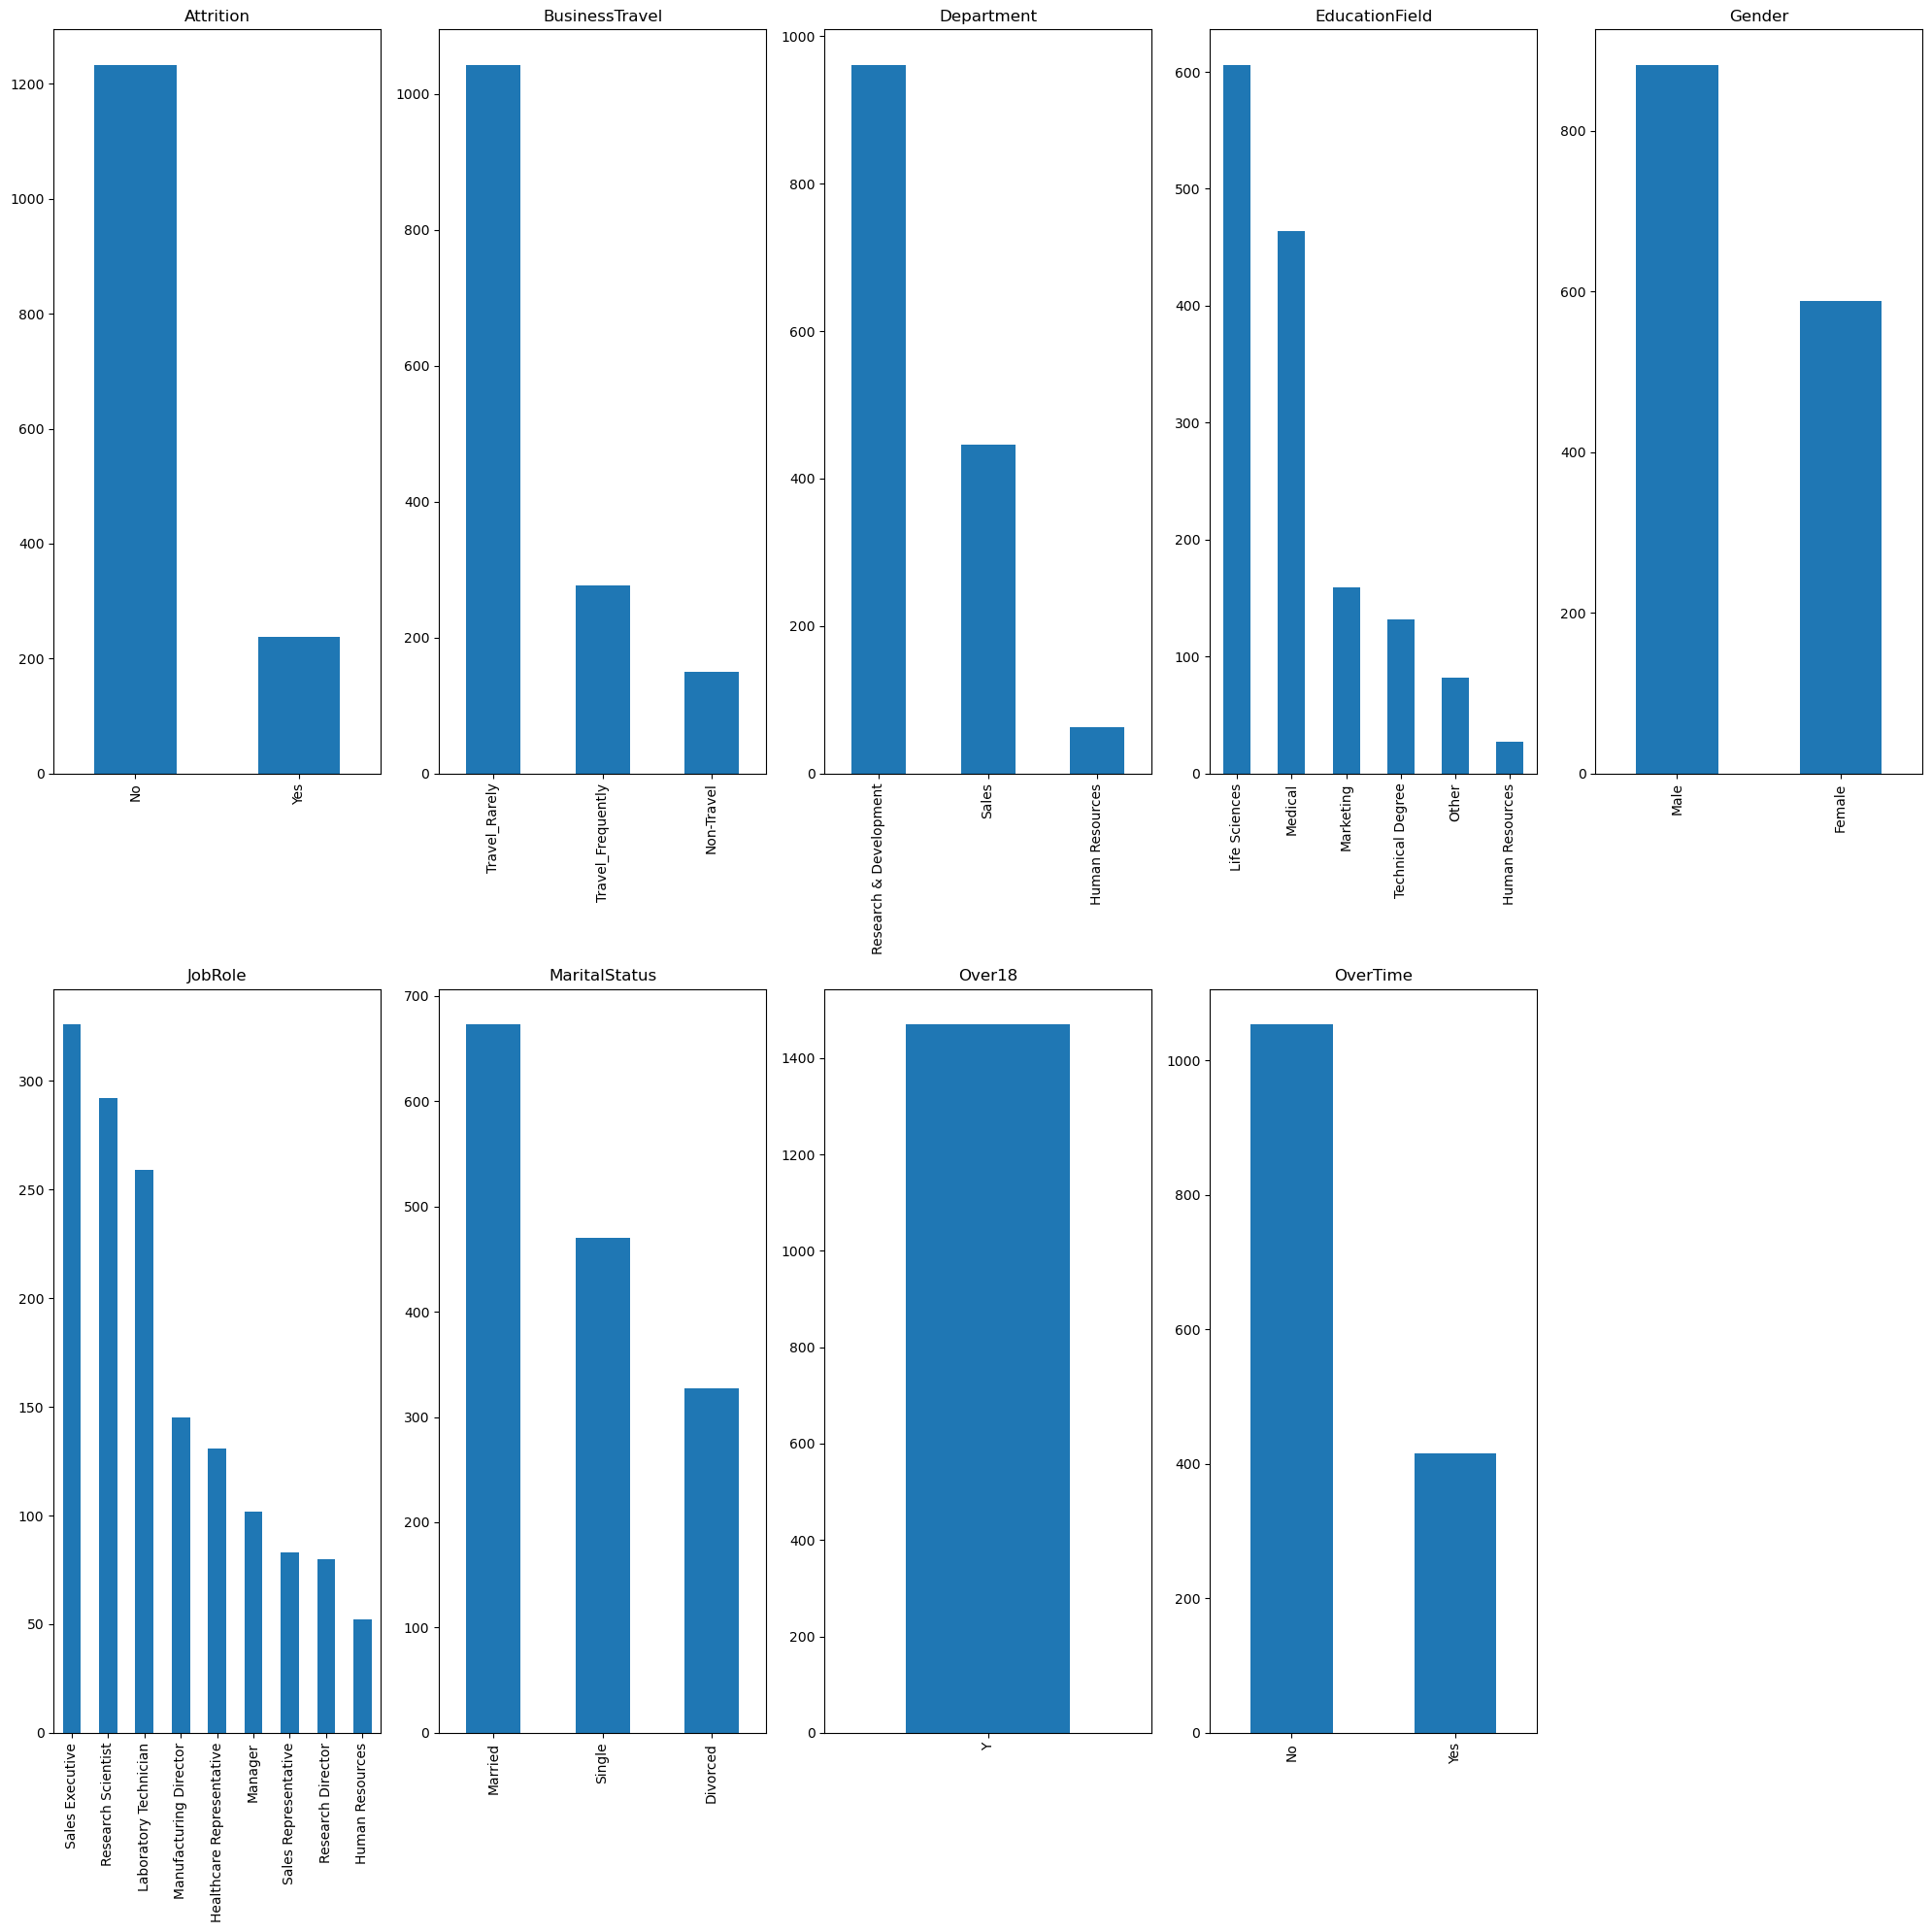

In [2706]:
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 20))

for column in categorical_columns:
    plt.subplot(2, len(categorical_columns)//2 + 1, categorical_columns.get_loc(column) + 1)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

plt.tight_layout()
plt.show()

In [2707]:
# we used OneHotEncoder to convert categorical data into numeric

In [2708]:
# we are plitting data into x and y then train test

In [2709]:
x=data.drop('Attrition',axis=1)
y=data.iloc[:,[1]]

In [2710]:
y

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


In [2711]:
y=y.replace({'Yes': 1,'No':0})
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [2712]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [2713]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,train_size=0.80,random_state=43)

## Separating Categorical and Numerical Dtypes

In [2714]:
dtypes=x_train.dtypes
cat_dtypes=dtypes[dtypes=='object'].index.tolist()
num_dtypes=dtypes[dtypes!='object'].index.tolist()
# num_dtpyes=x_train.select_dtypes(exclude='object').columns

In [2715]:
cat_dtypes

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [2716]:
# x_test.to_csv('x_test.csv',index=False)
# y_test.to_csv('y_test.csv',index=False)

## Using OneHotEncoder 

In [2717]:
ohe=OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False)

In [2718]:
x_train_new=ohe.fit_transform(x_train[cat_dtypes])

In [2719]:
x_train_new.shape # this is shape is less because it only have cat 

(881, 21)

## trail of get_dummies

In [2720]:
# x_train_new=pd.get_dummies(x_train)

In [2721]:
# x_train_new

## Now appending to the x_train

In [2722]:
x_train_stack=np.hstack((x_train[num_dtypes].values,x_train_new)) #this is best method to join num columns and cat columns 

In [2723]:
x_train_stack.shape

(881, 47)

In [2724]:
x_train_stack=pd.DataFrame(x_train_stack)

In [2725]:
x_train_stack.shape

(881, 47)

In [2726]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
580,35,Travel_Rarely,384,Sales,8,4,Life Sciences,1,805,1,...,2,80,1,3,1,2,3,2,0,2
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
643,42,Travel_Rarely,1265,Research & Development,3,3,Life Sciences,1,894,3,...,2,80,1,17,1,2,5,3,1,3
899,49,Travel_Rarely,1098,Research & Development,4,2,Medical,1,1256,1,...,3,80,1,23,2,4,1,0,0,0
319,32,Travel_Rarely,588,Sales,8,2,Technical Degree,1,436,3,...,4,80,0,13,2,3,13,12,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,30,Travel_Rarely,1334,Sales,4,2,Medical,1,121,3,...,2,80,3,11,4,2,11,8,2,7
413,42,Travel_Frequently,1368,Research & Development,28,4,Technical Degree,1,551,4,...,4,80,3,7,4,4,6,5,0,4
282,29,Travel_Frequently,442,Sales,2,2,Life Sciences,1,388,2,...,1,80,0,10,3,2,10,7,0,9
336,29,Travel_Rarely,318,Research & Development,8,4,Other,1,454,2,...,4,80,0,7,4,2,7,7,0,7


In [2727]:
x_train.shape

(881, 34)

In [2728]:
# now we splitted the data into train test now we have to check the y_train if the data is balanced or not

In [2729]:
y_train.value_counts()

Attrition
0            733
1            148
dtype: int64

In [2730]:
trail=pd.get_dummies(x_train,drop_first=True)

In [2731]:
trail.shape

(881, 47)

In [2732]:
# d_types1=data.drop('Attrition',axis=1).dtypes
d_types=trail.dtypes

In [2733]:
# d_types=x_train_new.dtypes
# d_types

In [2734]:
cat_data=d_types[d_types=='uint8'].index.tolist()

In [2735]:
# Assuming 'data' is your DataFrame
# cat_data = data.drop('Attrition',axis=1).select_dtypes(include=['object']).columns

In [2736]:
num_data=d_types[d_types!='uint8'].index.tolist()

In [2737]:
# Assuming 'data' is your DataFrame
# num_data = data.select_dtypes(exclude=['object']).columns

In [2738]:
cat_data

['BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'OverTime_Yes']

In [2739]:
smt=SMOTE(random_state=20)

## Changes

In [2740]:
x_train_stack,y_train=smt.fit_resample(trail,y_train)

In [2741]:
pca=PCA(n_components=8,random_state=42)

In [2742]:
random=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=15)

In [2743]:
x_train.shape,x_train_stack.shape

((881, 34), (1466, 47))

In [2745]:
x_train_stack.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
  

## Numerical Processor

In [2746]:
num_processor=Pipeline(
    steps=[('num',SimpleImputer(strategy='mean')),
    ('Scaling',StandardScaler())])

In [2747]:
num_prosessor

Pipeline(steps=[('num', SimpleImputer()), ('Scaling', StandardScaler())])

## Categorical Processor

In [2748]:
cat_processor=Pipeline(
    steps=[('cat',SimpleImputer(strategy='constant')),
    ('OneHotEncoder',ohe)])

In [2749]:
cat_prosessor

Pipeline(steps=[('cat', SimpleImputer(strategy='constant')),
                ('OneHotEncoder', OneHotEncoder(drop='first'))])

In [ ]:
'''i have to solve issue'''

## Combining All Processor

In [2769]:
# one_hot=ColumnTransformer(transformers=[('OneHotEncoder',OneHotEncoder(drop='first'),cat_data)],remainder='passthrough')
processor=ColumnTransformer(transformers=[('categorical',cat_prosessor,cat_data),
                                       ('numerical',num_prosessor,num_data),
                                         ],remainder='passthrough')                    

In [2770]:
# num_transformer=ColumnTransformer(transformers=[('categorical',num_prosessor,cat_data)],remainder='passthrough')                    

In [2773]:
processor.fit_transform(x_train_stack)

array([[ 0.        ,  1.        ,  0.        , ..., -0.40505705,
        -0.63872118, -0.3951522 ],
       [ 0.        ,  1.        ,  1.        , ..., -0.40505705,
        -0.63872118, -0.08100192],
       [ 0.        ,  1.        ,  1.        , ..., -0.10193626,
        -0.26817696, -0.08100192],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.20118454,
         0.84345571,  0.23314837],
       [ 0.        ,  0.        ,  1.        , ..., -0.40505705,
        -0.26817696, -0.3951522 ],
       [ 1.        ,  0.        ,  1.        , ..., -0.70817785,
        -0.63872118, -0.70930248]])

## Transformer 1

In [2760]:
transformer_1

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical',
                                 Pipeline(steps=[('cat',
                                                  SimpleImputer(strategy='constant')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'Over18', 'OverTime']),
                                ('numerical',
                                 Pipeline(steps=[('num', SimpleImputer()),
                                                 ('Scaling',
                                                  Sta...
                                  'HourlyRate', 'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'MonthlyIncome',
                                  'MonthlyRate', 'NumCompaniesWorked',
                                  'PercentSalaryHike', 'PerformanceRating',
                                  'RelationshipSatisfaction', 'StandardHours',
                                  'StockOptionLevel', 'TotalWorkingYears',
                                  'TrainingTimesLastYear', 'WorkLifeBalance',
                                  'YearsAtCompany', 'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager'])])

In [2775]:
# transformer_1.fit_transform(x_train_stack)

In [2779]:
x_train_stack

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,35,384,8,4,1,805,1,72,3,1,...,0,0,0,0,0,0,1,1,0,0
1,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
2,42,1265,3,3,1,894,3,95,4,2,...,1,0,0,0,0,0,0,1,0,1
3,49,1098,4,2,1,1256,1,85,2,5,...,0,1,0,0,0,0,0,1,0,0
4,32,588,8,2,1,436,3,65,2,2,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,34,591,10,3,1,1212,1,74,2,2,...,0,0,0,0,0,1,0,0,0,1
1462,31,413,12,4,1,750,1,71,1,2,...,0,0,0,0,0,1,0,1,0,1
1463,33,548,17,2,1,1773,2,65,2,2,...,0,0,0,0,0,1,0,0,1,0
1464,28,889,2,3,1,587,1,77,1,1,...,0,0,0,0,0,0,0,0,0,0


## Transformer 2

In [2776]:
transformer_2=ColumnTransformer(transformers=[('pca',pca,slice(0,100))])

In [2781]:
transformer_2.fit_transform(x_train).shape

ValueError: could not convert string to float: 'Travel_Rarely'

In [2763]:
pipe=make_pipeline(transformer_1,transformer_2)
pipe

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('cat',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('OneHotEncoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime']),
                                                 ('numerical',
                                                  Pipeline(steps=...
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StandardHours',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('pca',
                                                  PCA(n_components=8,
                                                      random_state=42),
                                                  slice(0, 100, None))]))])

In [2764]:
x_val.shape

(221, 34)

In [2765]:
pipe.fit(x_train_stack,y_train)

ValueError: A given column is not a column of the dataframe

## Combining All Processor With Random Forest

In [ ]:
random_forest_model=make_pipeline(pipe,
                                  random)

In [ ]:
random_forest_model

In [ ]:
random_forest_model.fit(x_train_stack,y_train)

In [ ]:
y_pred=random_forest_model.predict(x_val)

In [ ]:
print(classification_report(y_val,y_pred))

In [ ]:
x_train.shape

In [ ]:
pipe.fit_transform(x_train).shape

In [ ]:
pipe.fit_transform(x_val).shape

In [ ]:
filename='pipeline.pkl'
with open(filename,'wb') as file:
    pkl.dump(pipe,file)

## Now we are using ANN 

In [ ]:
from tensorflow import keras
from keras.models import Model
from keras.layers import MaxPooling2D,Dense,Dropout,Add
from keras import Sequential,layers

In [ ]:
input_size=x_train.shape[1]
input_size

In [ ]:
ann_model=Sequential()

ann_model.add(Dense(units=100,activation='relu',input_dim=input_size))
ann_model.add(Dense(units=150,activation='relu'))
ann_model.add(Dense(units=200,activation='relu'))
ann_model.add(Dense(units=250,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann_model.summary()

In [ ]:
ann_model.fit(x_train,y_train,batch_size=32,epochs=100,validation_split=0.20)

## ANN Model Pipeline

In [ ]:
ANN_model=make_pipeline(processor,pca,ann_model)

In [ ]:
ANN_model.fit(x_train,y_train)

In [ ]:
y_pred_ann=ANN_model.predict(x_test)

In [ ]:
x_test